In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.offline as pyoff
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import csv
from sklearn.linear_model import LogisticRegression
import re
%matplotlib inline
os.chdir("D:\AWANTUNAI\DATA\csv")

In [3]:
data_train = pd.read_csv("training_data_fix.csv")
#data_customers = pd.read_csv("data-test.csv")
#data_pefindo = pd.read_csv("data_pefindo.csv")
data_test = pd.read_csv("testing_data_fix.csv")

In [366]:
data_train.shape

(2319, 87)

In [367]:
data_test.shape

(10790, 84)

In [4]:
filter = data_train.id_number

In [5]:
data_test = data_test[~data_test['id_number'].isin(filter)]

In [6]:
data_test.shape

(8471, 84)

In [7]:
data_train = data_train.replace({"-": np.nan,'0':np.nan,' ':np.nan,"--":np.nan,'nan':np.nan})

In [8]:
data_test = data_test.replace({"-": np.nan,'0':np.nan,' ':np.nan,"--":np.nan,'nan':np.nan})

In [9]:
data_train['length_of_stay'] = data_train.length_of_stay.astype(str).str.lower()
data_train['final_result'] = data_train.final_result.astype(str).str.lower()
data_train['residence_kota'] = data_train.residence_kota.astype(str).str.lower()
data_train['home_status'] = data_train.home_status.astype(str).str.lower()
data_train['sales'] = data_train.sales.astype(str).str.lower()
data_train['pefindo_status'] = data_train.pefindo_status.astype(str).str.lower()

In [10]:
data_test['length_of_stay'] = data_test.length_of_stay.astype(str).str.lower()
data_test['final_result'] = data_test.final_result.astype(str).str.lower()
data_test['residence_kota'] = data_test.residence_kota.astype(str).str.lower()
data_test['home_status'] = data_test.home_status.astype(str).str.lower()
data_test['sales'] = data_test.sales.astype(str).str.lower()
data_test['pefindo_status'] = data_test.pefindo_status.astype(str).str.lower()

In [11]:
to_drop = ['loan_id','days','akun_ecommerce(online)','emergency_contact1_address', 'emergency_contact1_kecamatan',
       'emergency_contact1_kelurahan', 'emergency_contact1_kota',
       'emergency_contact1_name', 'emergency_contact1_phone_number',
       'emergency_contact1_relationship', 'emergency_contact1_rt',
       'emergency_contact1_rw', 'emergency_contact2_address','full_name',
       'emergency_contact2_name', 'emergency_contact2_phone_number',
       'emergency_contact2_relationship','foto_depan_toko', 'foto_ktp',
       'foto_near_store', 'foto_receipt', 'foto_rekening', 'foto_sku','dpd',
       'foto_stock', 'respondent1_info', 'respondent1_job', 'respondent1_long_relation',
       'respondent1_name', 'respondent1_relation', 'respondent2_info','phone_number',
       'respondent2_job', 'respondent2_long_relation', 'respondent2_name',
       'respondent2_relation', 'selfie_ktp(online)','aasm_state','numof_dependence',
       'tanda_pengenal_lain(online)', 'team_leader','zipcode','document_confirmation_x',
    'legal_kecamatan','residence_address','residence_kecamatan','residence_kelurahan','residence_rt','residence_rw',
       'legal_kelurahan', 'legal_kota', 'legal_rt', 'legal_rw','monthly_income',
       'legal_zipcode',  'mother_name','other_customer_income','document_confirmation_y','phone_number_wa']
data_train.drop(to_drop, inplace=True, axis=1)

In [12]:
to_drop = ['akun_ecommerce(online)','emergency_contact1_address', 'emergency_contact1_kecamatan',
       'emergency_contact1_kelurahan', 'emergency_contact1_kota',
       'emergency_contact1_name', 'emergency_contact1_phone_number',
       'emergency_contact1_relationship', 'emergency_contact1_rt',
       'emergency_contact1_rw', 'emergency_contact2_address','phone_number',
       'emergency_contact2_name', 'emergency_contact2_phone_number','dpd',
       'emergency_contact2_relationship','foto_depan_toko', 'foto_ktp','full_name',
       'foto_near_store', 'foto_receipt', 'foto_rekening', 'foto_sku',
       'foto_stock', 'respondent1_info', 'respondent1_job', 'respondent1_long_relation',
       'respondent1_name', 'respondent1_relation', 'respondent2_info',
       'respondent2_job', 'respondent2_long_relation', 'respondent2_name',
       'respondent2_relation', 'selfie_ktp(online)','residence_address','residence_kecamatan','residence_kelurahan','residence_rt','residence_rw',
       'tanda_pengenal_lain(online)', 'team_leader','zipcode','document_confirmation_x',
    'legal_kecamatan','aasm_state','monthly_income','numof_dependence',
       'legal_kelurahan', 'legal_kota', 'legal_rt', 'legal_rw',
       'legal_zipcode',  'mother_name','other_customer_income','document_confirmation_y','phone_number_wa']
data_test.drop(to_drop, inplace=True, axis=1)

In [13]:
data_train.shape

(2319, 28)

In [378]:
data_test.shape

(8471, 27)

In [14]:
jakarta_dict = ['dki jakart','tomang', 'tanah abang', 'jatinegara','cilincing', 'tomang', 'wonogiri','mojokerto','jatinegara', 'dki jakarta', 'dki jakarta pusat','dki jakarta timur', 'dki jakrta','jajarta barat', 'jak pus', 'jak ut', 'jakaeta barat',
       'jakarat utara', 'jakarata barat', 'jakarata timur','jakarra utara','jkarta timur', 'jakart', 'jakarta', 'jakarta ', 'jakarta barat',
       'jakarta barat ', 'jakarta barat 11130', 'jakarta barat 11140','jakarta barat 11210', 'jakarta barat 11270','jakarta barat 11320', 'jakarta barat 11550',
       'jakarta barat 11650', 'jakarta barat pusat', 'jakarta baru','jakarta pusat', 'jakarta pusat ', 'jakarta rimur','jakarta selatan', 'jakarta selatan 12230', 'jakarta tikur',
       'jakarta timir', 'kramat jati','jakarta timjr', 'jakarta timu', 'jakarta timur','jakarta timur ', 'jakarta timur 13320', 'jakarta timur 13410',
       'jakarta timur 13720', 'jakarta timut', 'jakarta tumur','jakarta utara', 'jakarta utara ', 'jakarta utara, dki jakarta',
       'jakarta utata', 'jakarta. utara', 'jakartaa barat','jakartaselatan', 'jakarya pusat', 'jakata barat', 'jakata timur',
       'jakatta selatan', 'jakatta utara', 'jakbar', 'jakpus', 'jakrta','jakrta barat', 'jakrta pusat', 'jakrta selatan', 'jakrta timur',
       'jaksel', 'jakta selatan', 'jaktim', 'jakut', 'jalarta barat','jarkarta utara', 'jarta utara', 'jatinegara', 'jawa barat',
       'jkarta timur','kota jakarta', 'kota jakarta timur','tanah abang']
banten_dict = ['kota rangkas bitung','serang','pandeglang','lebak','tanggerang','ciputat','ciledug','kab tangerang','tangerang','tangerang selatan 15318', 'tangerang selatan 15412','tangerang 15341', 'tangerang banten', 'tangerang banten 15341',
       'tangerang ciledug', 'tangerang kota', 'tangerang selatan','tangerang selatan ', 'tangerang selatan 15310','tangerang selatan 15313', 'tangerang selatan 15318',
       'tangerang selatan 15412', 'tangerang selatan 15417','tangerang selatan 5310', 'tangerang selatqn', 'tangerarang 15850',
       'tangetang selatan', 'tanggerang', 'tanggerang selatan','tanggrang', 'tanggrang selatan', 'tangsel','tegerang', 'kota tangerang', 'kota tangerang selatan','kab tangerang' ]
jawa_barat = [ 'bekas', 'pondok gede','parung','kuningan', 'kuningan jawa barat', 'kab legok','depok', 'depok ', 'depok jawa barat', 'depok timur', 'depon','cirebon','ciledug tangerang', 'bekasi','bandung','tasikmalaya','cibinong, kab. bogor',
       'bekasi barat', 'bekasi jawa barat', 'bekasi jaya', 'bekasi kota','bekasi selatan',  'citayam','cibinong. kab. bogor', 'cibitung bekasi', 'bekasi timur', 'bekasi utara', 'bekasih',
       'bekaso', 'bekasu','kab bekasi','kab.bekasi','kabupaten bekasi','bigor', 'bogor', 'bogor ', 'bogor barat','bogor jawa barat', 'bogor kota', 'bogor tengah', 'bogor timur',
       'bogor utara', 'cibitung bekasi', 'cikarang','sukabumi','cikarang barat ( bekasi )', 'cikarang utara bekasi', 'bogot','kab bogor','kab.bogor','kabupaten bogor', 'kabupaten bogot','kota bogor', 'kota bogor barat',]
jawa_tengah =[ 'grobongan', 'tegal','wonogiri']
jawa_timur = ['gresik','mojokerto','pasar rebo cijantung','sidoarjo']
luar_jawa = ['pekanbaru','bandar lampung','pekanbaru','solok', 'tanah datar']

def clean_city(city):
    if city in jakarta_dict:
        return'jakarta'
    elif city in banten_dict:
        return 'banten'
    elif city in jawa_barat:
        return 'jawa barat'
    elif city in jawa_tengah:
        return 'jawa tengah'
    elif city in jawa_timur:
        return 'jawa timur'
    else:
        return 'luar jawa'
       
data_train['residence_kota']=data_train['residence_kota'].apply(lambda x: clean_city(x))

In [15]:
jakarta_dict = ['dki jakart','tomang', 'tanah abang', 'jatinegara','cilincing', 'tomang', 'wonogiri','mojokerto','jatinegara', 'dki jakarta', 'dki jakarta pusat','dki jakarta timur', 'dki jakrta','jajarta barat', 'jak pus', 'jak ut', 'jakaeta barat',
       'jakarat utara', 'jakarata barat', 'jakarata timur','jakarra utara','jkarta timur', 'jakart', 'jakarta', 'jakarta ', 'jakarta barat',
       'jakarta barat ', 'jakarta barat 11130', 'jakarta barat 11140','jakarta barat 11210', 'jakarta barat 11270','jakarta barat 11320', 'jakarta barat 11550',
       'jakarta barat 11650', 'jakarta barat pusat', 'jakarta baru','jakarta pusat', 'jakarta pusat ', 'jakarta rimur','jakarta selatan', 'jakarta selatan 12230', 'jakarta tikur',
       'jakarta timir', 'kramat jati','jakarta timjr', 'jakarta timu', 'jakarta timur','jakarta timur ', 'jakarta timur 13320', 'jakarta timur 13410',
       'jakarta timur 13720', 'jakarta timut', 'jakarta tumur','jakarta utara', 'jakarta utara ', 'jakarta utara, dki jakarta',
       'jakarta utata', 'jakarta. utara', 'jakartaa barat','jakartaselatan', 'jakarya pusat', 'jakata barat', 'jakata timur',
       'jakatta selatan', 'jakatta utara', 'jakbar', 'jakpus', 'jakrta','jakrta barat', 'jakrta pusat', 'jakrta selatan', 'jakrta timur',
       'jaksel', 'jakta selatan', 'jaktim', 'jakut', 'jalarta barat','jarkarta utara', 'jarta utara', 'jatinegara', 'jawa barat',
       'jkarta timur','kota jakarta', 'kota jakarta timur','tanah abang']
banten_dict = ['kota rangkas bitung','serang','pandeglang','lebak','tanggerang','ciputat','ciledug','kab tangerang','tangerang','tangerang selatan 15318', 'tangerang selatan 15412','tangerang 15341', 'tangerang banten', 'tangerang banten 15341',
       'tangerang ciledug', 'tangerang kota', 'tangerang selatan','tangerang selatan ', 'tangerang selatan 15310','tangerang selatan 15313', 'tangerang selatan 15318',
       'tangerang selatan 15412', 'tangerang selatan 15417','tangerang selatan 5310', 'tangerang selatqn', 'tangerarang 15850',
       'tangetang selatan', 'tanggerang', 'tanggerang selatan','tanggrang', 'tanggrang selatan', 'tangsel','tegerang', 'kota tangerang', 'kota tangerang selatan','kab tangerang' ]
jawa_barat = [ 'bekas', 'pondok gede','parung','kuningan', 'kuningan jawa barat', 'kab legok','depok', 'depok ', 'depok jawa barat', 'depok timur', 'depon','cirebon','ciledug tangerang', 'bekasi','bandung','tasikmalaya','cibinong, kab. bogor',
       'bekasi barat', 'bekasi jawa barat', 'bekasi jaya', 'bekasi kota','bekasi selatan',  'citayam','cibinong. kab. bogor', 'cibitung bekasi', 'bekasi timur', 'bekasi utara', 'bekasih',
       'bekaso', 'bekasu','kab bekasi','kab.bekasi','kabupaten bekasi','bigor', 'bogor', 'bogor ', 'bogor barat','bogor jawa barat', 'bogor kota', 'bogor tengah', 'bogor timur',
       'bogor utara', 'cibitung bekasi', 'cikarang','sukabumi','cikarang barat ( bekasi )', 'cikarang utara bekasi', 'bogot','kab bogor','kab.bogor','kabupaten bogor', 'kabupaten bogot','kota bogor', 'kota bogor barat',]
jawa_tengah =[ 'grobongan', 'tegal','wonogiri']
jawa_timur = ['gresik','mojokerto','pasar rebo cijantung','sidoarjo']
luar_jawa = ['pekanbaru','bandar lampung','pekanbaru','solok', 'tanah datar']

def clean_city(city):
    if city in jakarta_dict:
        return'jakarta'
    elif city in banten_dict:
        return 'banten'
    elif city in jawa_barat:
        return 'jawa barat'
    elif city in jawa_tengah:
        return 'jawa tengah'
    elif city in jawa_timur:
        return 'jawa timur'
    else:
        return 'luar jawa'
       
data_test['residence_kota']=data_test['residence_kota'].apply(lambda x: clean_city(x))

In [16]:
pribadi = [ 'milik pribadi', 'milik sendiri', 'pribadi','pribadi (toko sudah 10th)','pribadi (toko sudah 2th)','pribadi (toko sudah 5th)', 
          'pribadi (toko sudah 6th)','pribadi / p', 'sendiri']
kontrakan = ['2tahun','jalan 10th', 'kontrak', 'pribadi /  2 s/d 3 thn', 'pribadi / 1 s/d 2 thn','pribadi / 1 tempat dengan rumah', 'pribadi / 1th','sewa', 'sewa / 3 s/d 4 thn',
       'sewa / usaha sudah 4 s/d 5 thn', 'sewa,', 'sewa/kontrak', 'pribadi / 3th', 'pribadi / 3thn', 'pribadi / 4th / toko sewa',
       'pribadi / jadi', 'pribadi / kurang lebih 1 bulan', 'ngontrak', 'kontrakan: 6th / onlineshop: 2th / pribadi','milik bersama join teman' ]
keluarga = ['milik keluarga','rumah orang tua', 'milik keluarga ', 'milik orang tua', 'milik orang tua saya', 'milik orangtua',
       'milik orangtua ','orang tua', 'orang tua / keluarga', 'orangtua' ]
rumah_dinas =['rumah dinas', 'rumah dinas yayasan strada','sales marketing']

def home_status(status):
    if status in pribadi:
        return 'pribadi'
    elif status in kontrakan:
        return 'kontrakan'
    elif status in keluarga:
        return 'keluarga'
    elif status in rumah_dinas:
        return 'rumah dinas'
    else:
        return '0'
       
data_train['home_status']=data_train['home_status'].apply(lambda x: home_status(x))

In [17]:
pribadi = [ 'milik pribadi', 'milik sendiri', 'pribadi','pribadi (toko sudah 10th)','pribadi (toko sudah 2th)','pribadi (toko sudah 5th)', 
          'pribadi (toko sudah 6th)','pribadi / p', 'sendiri']
kontrakan = ['2tahun','jalan 10th', 'kontrak', 'pribadi /  2 s/d 3 thn', 'pribadi / 1 s/d 2 thn','pribadi / 1 tempat dengan rumah', 'pribadi / 1th','sewa', 'sewa / 3 s/d 4 thn',
       'sewa / usaha sudah 4 s/d 5 thn', 'sewa,', 'sewa/kontrak', 'pribadi / 3th', 'pribadi / 3thn', 'pribadi / 4th / toko sewa',
       'pribadi / jadi', 'pribadi / kurang lebih 1 bulan', 'ngontrak', 'kontrakan: 6th / onlineshop: 2th / pribadi','milik bersama join teman' ]
keluarga = ['milik keluarga','rumah orang tua', 'milik keluarga ', 'milik orang tua', 'milik orang tua saya', 'milik orangtua',
       'milik orangtua ','orang tua', 'orang tua / keluarga', 'orangtua' ]
rumah_dinas =['rumah dinas', 'rumah dinas yayasan strada','sales marketing']

def home_status(status):
    if status in pribadi:
        return 'pribadi'
    elif status in kontrakan:
        return 'kontrakan'
    elif status in keluarga:
        return 'keluarga'
    elif status in rumah_dinas:
        return 'rumah dinas'
    else:
        return '0'
       
data_train['home_status']=data_train['home_status'].apply(lambda x: home_status(x))

In [18]:
personal = ['agung mujianto', 'aidila', 'aneto','arifa', 'chakra', 'edo maulana','eri darmawan','erwin mulawarman','irmayanti elisabeth','lukman nurhakim',
            'misbakhul arifin','nanda saputra','nano', 'rheza firdaus', 'rudi gunawan', 'rudy gunawan','sampingan ', 'smd', 'suhaz', 'sumaryono', 'vicky herdiansyah','abs']
aplikasi = ['aplikasi awan tunai']
sosial = ['lainnya (social media,facebook & instagram)','fb & ig' ]
employee=['internal merchandiser awantunai', 'merchant referral','sales marketing','employee awantunai (internal)','employee referral awantunai (internal)']


def sales(sales):
    if sales in personal:
        return 'personal'
    elif sales in aplikasi:
        return 'aplikasi'
    elif sales in sosial:
        return 'sosial'
    elif sales in employee:
        return 'employee'
    else:
        return 'lainnya'
       
data_train['sales']=data_train['sales'].apply(lambda x: sales(x))

In [19]:
personal = ['agung mujianto', 'aidila', 'aneto','arifa', 'chakra', 'edo maulana',
           'eri darmawan','erwin mulawarman','irmayanti elisabeth','lukman nurhakim',
            'misbakhul arifin','nanda saputra','nano', 'rheza firdaus', 'rudi gunawan', 'rudy gunawan',
       'sampingan ', 'smd', 'suhaz', 'sumaryono', 'vicky herdiansyah','abs']
aplikasi = ['aplikasi awan tunai']
sosial = ['lainnya (social media,facebook & instagram)','fb & ig' ]
employee=['internal merchandiser awantunai', 'merchant referral','sales marketing','employee awantunai (internal)','employee referral awantunai (internal)']


def sales(sales):
    if sales in personal:
        return 'personal'
    elif sales in aplikasi:
        return 'aplikasi'
    elif sales in sosial:
        return 'sosial'
    elif sales in employee:
        return 'employee'
    else:
        return 'lainnya'
       
data_test['sales']=data_test['sales'].apply(lambda x: sales(x))

In [20]:
data_train['dob'].fillna(data_train['dob'].mode()[0], inplace=True)
data_train['total_income'].fillna(data_train['total_income'].mode()[0], inplace=True)
data_train['total_installment'].fillna(data_train['total_installment'].mode()[0], inplace=True)
data_train['credit_card_amount'].fillna(data_train['credit_card_amount'].mode()[0], inplace=True)
data_train['number_of_inquiries'].fillna(data_train['number_of_inquiries'].mode()[0], inplace=True)
data_train['number_of_other_creditors'].fillna(data_train['number_of_other_creditors'].mode()[0], inplace=True)
data_train['worst_current_arrears'].fillna(data_train['worst_current_arrears'].mode()[0], inplace=True)
data_train['length_of_stay'].fillna(data_train['length_of_stay'].mode()[0], inplace=True)
data_train['pefindo_score'].fillna(data_train['pefindo_score'].mode()[0], inplace=True)
data_train['total_credit'].fillna(data_train['total_credit'].mode()[0], inplace=True)
data_train['total_debtor'].fillna(data_train['total_debtor'].mode()[0], inplace=True)
data_train['worst_arrears_last_12_months'].fillna(data_train['worst_arrears_last_12_months'].mode()[0], inplace=True)
data_train['final_result'].fillna(data_train['final_result'].mode()[0], inplace=True)
data_train['oldest_opening_date'].fillna(data_train['oldest_opening_date'].mode()[0], inplace=True)
data_train['inquiring_subscriber_during_last_12_months'].fillna(data_train['inquiring_subscriber_during_last_12_months'].mode()[0], inplace=True)


In [21]:
data_test['dob'].fillna(data_test['dob'].mode()[0], inplace=True)
data_test['total_income'].fillna(data_test['total_income'].mode()[0], inplace=True)
data_test['total_installment'].fillna(data_test['total_installment'].mode()[0], inplace=True)
data_test['credit_card_amount'].fillna(data_test['credit_card_amount'].mode()[0], inplace=True)
data_test['number_of_inquiries'].fillna(data_test['number_of_inquiries'].mode()[0], inplace=True)
data_test['number_of_other_creditors'].fillna(data_test['number_of_other_creditors'].mode()[0], inplace=True)
data_test['worst_current_arrears'].fillna(data_test['worst_current_arrears'].mode()[0], inplace=True)
data_test['length_of_stay'].fillna(data_test['length_of_stay'].mode()[0], inplace=True)
data_test['pefindo_score'].fillna(data_test['pefindo_score'].mode()[0], inplace=True)
data_test['total_credit'].fillna(data_test['total_credit'].mode()[0], inplace=True)
data_test['total_debtor'].fillna(data_test['total_debtor'].mode()[0], inplace=True)
data_test['worst_arrears_last_12_months'].fillna(data_test['worst_arrears_last_12_months'].mode()[0], inplace=True)
data_test['final_result'].fillna(data_test['final_result'].mode()[0], inplace=True)
data_test['oldest_opening_date'].fillna(data_test['oldest_opening_date'].mode()[0], inplace=True)
data_test['inquiring_subscriber_during_last_12_months'].fillna(data_test['inquiring_subscriber_during_last_12_months'].mode()[0], inplace=True)


In [22]:
data_train['oldest_opening_date'] = pd.to_datetime(data_train['oldest_opening_date'], errors='coerce')
curr_time= pd.to_datetime("now")
data_train['oldest_opening_year'] = curr_time - data_train['oldest_opening_date']
data_train['oldest_opening_year'] = data_train['oldest_opening_year'] / 365
data_train['oldest_opening_year'] = data_train['oldest_opening_year'].dt.days

In [23]:
data_test['oldest_opening_date'] = pd.to_datetime(data_test['oldest_opening_date'], errors='coerce')
curr_time= pd.to_datetime("now")
data_test['oldest_opening_year'] = curr_time - data_test['oldest_opening_date']
data_test['oldest_opening_year'] = data_test['oldest_opening_year'] / 365
data_test['oldest_opening_year'] = data_test['oldest_opening_year'].dt.days


In [24]:
mapping_dict_2 = {
    'pefindo_score': {
        'NO': 0,
        'YES': 500,
        'RENEWAL ATAU NEW APPLICATION':250,
        'KTP SUMATRA TINGGAL DI SUMATRA':0,
       
    }
}

data_test.replace(mapping_dict_2, inplace=True)

In [25]:
mapping_dict_7 = {
    'worst_current_arrears': {
       
        '733,000':733000,
    }
}

data_train.replace(mapping_dict_7, inplace=True)

In [26]:
mapping_dict_7 = {
    'worst_current_arrears': {
       
        '733,000':733000,
    }
}

data_test.replace(mapping_dict_7, inplace=True)

In [27]:
mapping_dict_2 = {
    'total_credit': {
        '2017-05-23':data_test['total_credit'].mode()[0] ,
      
    }
}

data_test.replace(mapping_dict_2, inplace=True)

In [28]:
data_test['oldest_opening_year'].fillna(data_test['oldest_opening_year'].mode()[0], inplace=True)
data_train['oldest_opening_year'].fillna(data_train['oldest_opening_year'].mode()[0], inplace=True)

In [29]:

data_test['total_income'] = data_test['total_income'].str.replace(',','')
data_test['total_installment'] = data_test['total_installment'].str.replace(',','')

In [30]:

data_train['total_income'] = data_train['total_income'].str.replace(',','')
data_train['total_installment'] = data_train['total_installment'].str.replace(',','')

In [31]:
data_train['credit_card_amount']=data_train['credit_card_amount'].astype(int)
data_test['credit_card_amount']=data_test['credit_card_amount'].astype(int)
data_train['number_of_inquiries'] = data_train['number_of_inquiries'].astype(int)
data_test['number_of_inquiries'] = data_test['number_of_inquiries'].astype(int)
data_train['number_of_other_creditors'] = data_train['number_of_other_creditors'].astype(int)
data_test['number_of_other_creditors'] = data_test['number_of_other_creditors'].astype(int)
data_train['oldest_opening_year'] = data_train['oldest_opening_year'].astype(int)
data_test['oldest_opening_year'] = data_test['oldest_opening_year'].astype(int)
data_train['oldest_opening_year'] = data_train['oldest_opening_year'].astype(int)
data_test['worst_current_arrears'] = data_test['worst_current_arrears'].astype(int)
data_train['worst_current_arrears'] = data_train['worst_current_arrears'].astype(int)
data_test['pefindo_score'] = data_test['pefindo_score'].astype(int)
data_train['pefindo_score'] = data_train['pefindo_score'].astype(int)
data_test['total_credit'] = data_test['total_credit'].astype(int)
data_train['total_credit'] = data_train['total_credit'].astype(int)
data_test['total_debtor'] = data_test['total_debtor'].astype(int)
data_train['total_debtor'] = data_train['total_debtor'].astype(int)
data_train['worst_arrears_last_12_months'] = data_train['worst_arrears_last_12_months'].astype(int)
data_test['worst_arrears_last_12_months'] = data_test['worst_arrears_last_12_months'].astype(int)
data_train['total_income'] = data_train['total_income'].astype(int)
data_train['total_installment'] = data_train['total_installment'].astype(int)
data_test['total_income'] = data_test['total_income'].astype(int)
data_test['total_installment'] = data_test['total_installment'].astype(int)
data_train['inquiring_subscriber_during_last_12_months'] = data_train['inquiring_subscriber_during_last_12_months'].astype(int)
data_test['inquiring_subscriber_during_last_12_months'] = data_test['inquiring_subscriber_during_last_12_months'].astype(int)

In [32]:
data_train['dob'] = data_train['dob'].astype('datetime64[ns]')
data_test['dob'] = data_test['dob'].astype('datetime64[ns]')

In [33]:
#data_train['dob'].fillna(data_train['dob'].mode()[0], inplace=True)

In [34]:
#data_test['dob'].fillna(data_test['dob'].mode()[0], inplace=True)

In [35]:
curr_time= pd.to_datetime("now")
data_train['dob'] = curr_time - data_train['dob']
data_train['dob'] = data_train['dob'] / 364
data_train['dob'] = data_train['dob'].dt.days
#data_train['dob'].fillna(0, inplace=True)
#data_train = data_train[data_train.dob!= 0]

In [36]:
curr_time= pd.to_datetime("now")
data_test['dob'] = curr_time - data_test['dob']
data_test['dob'] = data_test['dob'] / 364
data_test['dob'] = data_test['dob'].dt.days
#data_train['dob'].fillna(0, inplace=True)
#data_train = data_train[data_train.dob!= 0]

In [37]:
data_train['kategori_usia'] = pd.cut(data_train.dob,[0,15,25,35,45,55,65],labels=['0-15','15-25','25-35','35-45','45-55','55-65'])

In [38]:
data_test['kategori_usia'] = pd.cut(data_test.dob,[0,15,25,35,45,55,65],labels=['0-15','15-25','25-35','35-45','45-55','55-65'])

In [39]:
data_train['kategori_usia'].fillna(data_train['kategori_usia'].mode()[0], inplace=True)
data_test['kategori_usia'].fillna(data_test['kategori_usia'].mode()[0], inplace=True)

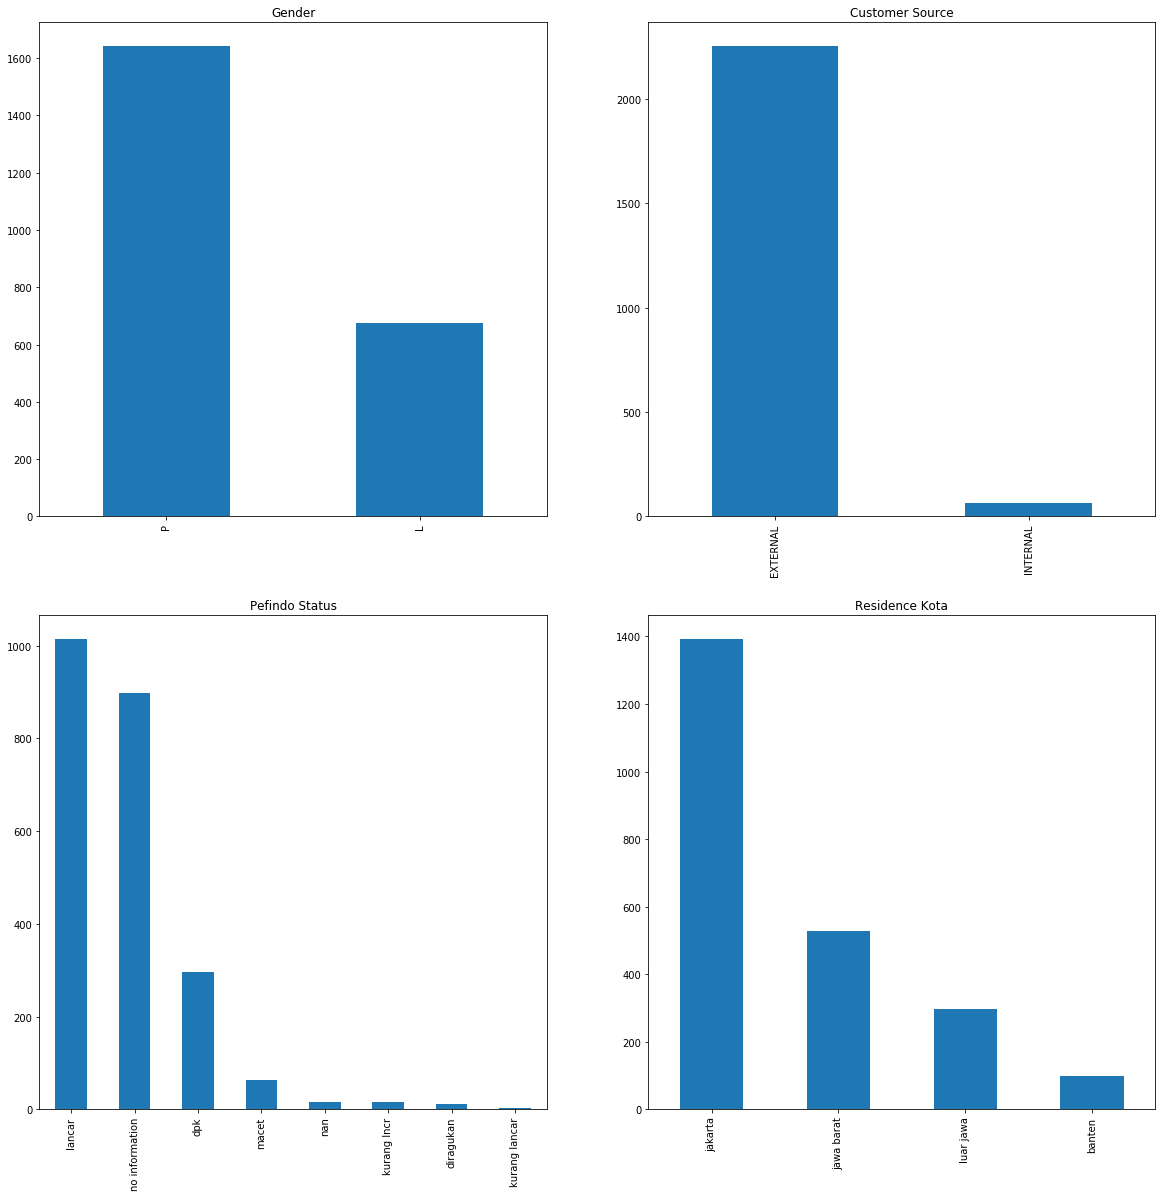

In [40]:
# Visualizing categorical features
plt.figure(1)
plt.subplot(221)
data_train['gender'].value_counts().plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(222)
data_train['customer_source'].value_counts().plot.bar(figsize=(20,20),title= 'Customer Source')

plt.subplot(223)
data_train['pefindo_status'].value_counts().plot.bar(title= 'Pefindo Status')

plt.subplot(224)
data_train['residence_kota'].value_counts().plot.bar(title= 'Residence Kota')

plt.show()

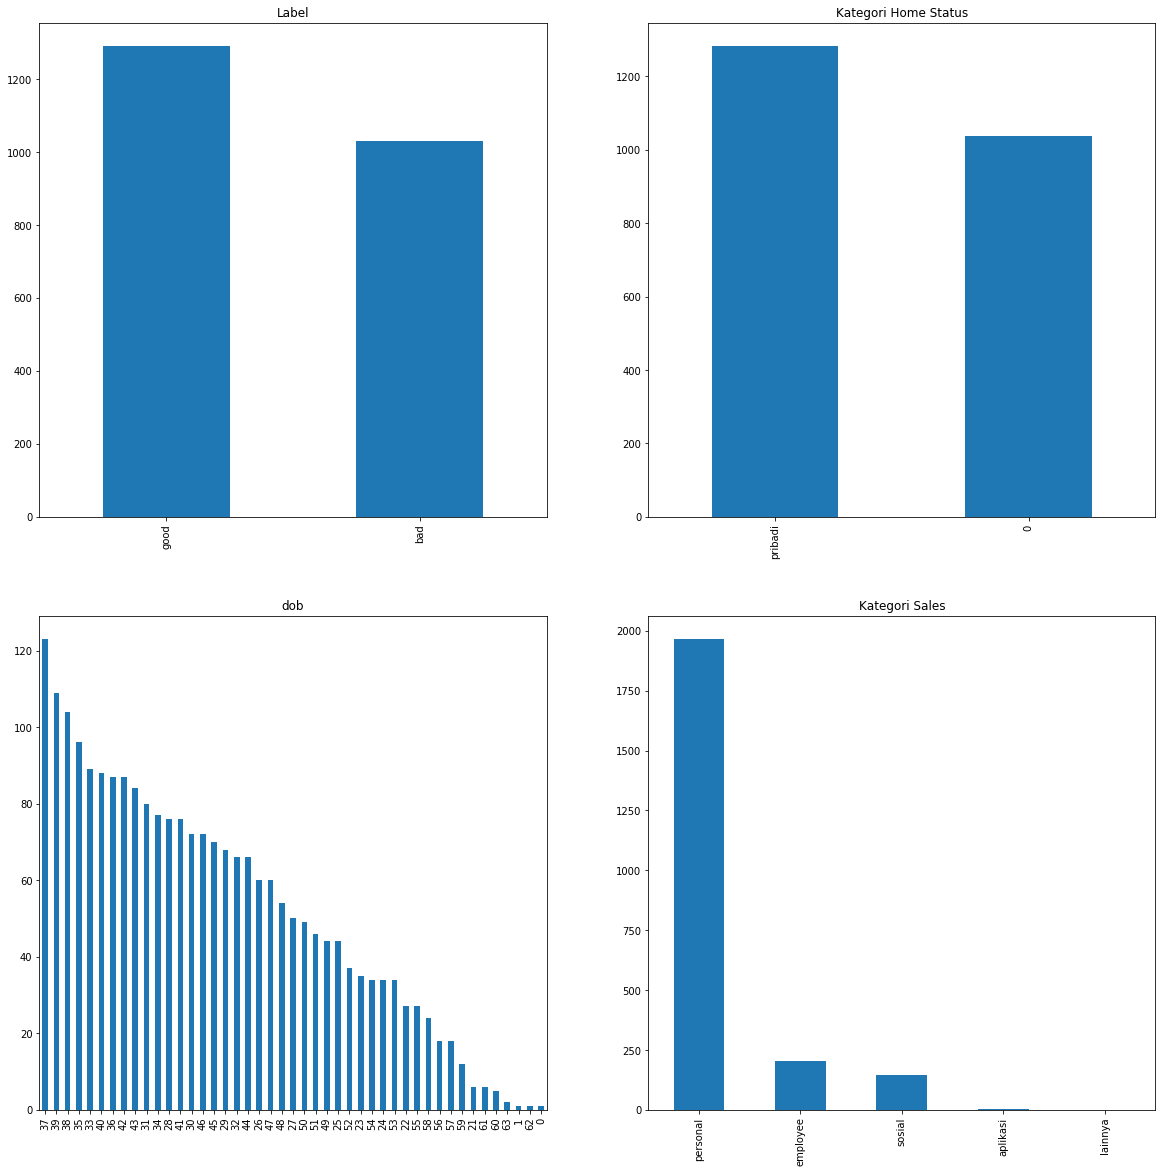

In [41]:
# Visualizing categorical features
plt.figure(2)
plt.subplot(221)
data_train['label'].value_counts().plot.bar(figsize=(20,10), title= 'Label')

plt.subplot(222)
data_train['home_status'].value_counts().plot.bar(figsize=(20,20),title= 'Kategori Home Status')

plt.subplot(223)
data_train['dob'].value_counts().plot.bar(title= 'dob')

plt.subplot(224)
data_train['sales'].value_counts().plot.bar(title= 'Kategori Sales')

plt.show()

In [42]:
data_train['label'] = data_train['label'].replace(['bad'],0)
data_train['label'] = data_train['label'].replace(['good'],1)

In [43]:
data_test['oldest_opening_date'] = pd.to_datetime(data_test['oldest_opening_date'], errors='coerce')

In [44]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data_train['residence_kota'] = label_encoder.fit_transform(data_train['residence_kota'])
data_test['residence_kota'] = label_encoder.fit_transform(data_test['residence_kota'])
data_train['home_status'] = label_encoder.fit_transform(data_train['home_status'])
data_test['home_status'] = label_encoder.fit_transform(data_test['home_status'])
data_train['sales'] = label_encoder.fit_transform(data_train['sales'])
data_test['sales'] = label_encoder.fit_transform(data_test['sales'])
data_train['pefindo_status'] = label_encoder.fit_transform(data_train['pefindo_status'])
data_test['pefindo_status'] = label_encoder.fit_transform(data_test['pefindo_status'])
data_train['gender'] = label_encoder.fit_transform(data_train['gender'])
data_test['gender'] = label_encoder.fit_transform(data_test['gender'])
data_train['customer_source'] = label_encoder.fit_transform(data_train['customer_source'])
data_test['customer_source'] = label_encoder.fit_transform(data_test['customer_source'])
data_train['kategori_usia'] = label_encoder.fit_transform(data_train['kategori_usia'])
data_test['kategori_usia'] = label_encoder.fit_transform(data_test['kategori_usia'])

In [45]:
data_train = data_train.replace({"nan":np.nan})

In [46]:
data_test = data_test.replace({"nan":np.nan})

In [47]:
data_train['length_of_stay'].fillna(data_train['length_of_stay'].mode()[0], inplace=True)

In [48]:
data_test['length_of_stay'].fillna(data_test['length_of_stay'].mode()[0], inplace=True)

In [49]:
mapping_dict_1 = {
    'length_of_stay': {
        
        '25 tahun': 11,
        'lebih dari 10 tahun': 11,
        'lebih dari 10 tahun' : 11,
        '13 tahun' : 11,
        '14 tahun': 11,
        '20thn' : 11,
        '28 tahun' : 11,
        '45 tahun' : 11,
        
        '9 - 10 tahun': 10,
        '8thun' : 9,
        '8 - 9 tahun': 9,
        '7 - 8 tahun': 8,
        '6 - 7 tahun' : 7,
        '5- 6 tahun': 6,
        '4 - 5 tahun': 5,
        '3 - 4 tahun': 4,
        '3 tahun' : 3,
        '2 - 3 tahun': 3,
        '1 - 2 tahun': 2,
        'diatas satu tahun' :2,
        'di atas satu tahun': 2,
        'diatas 1 tahun' : 2,
        'dibawah 1 tahun' : 1,
       
       
    }
}

data_train.replace(mapping_dict_1, inplace=True)

In [50]:
mapping_dict_1 = {
    'length_of_stay': {
        'di atas 10 thn':11,
        '25 s/d 6 thn':11,
        '25 tahun': 11,
        'lebih dari 10 tahun': 11,
        'lebih dari 10 tahun' : 11,
        '13 tahun' : 11,
        '14 tahun': 11,
        '20thn' : 11,
        '28 tahun' : 11,
        '45 tahun' : 11,
         '9 -  10 tahun':10,
        '9 - 10 tahun': 10,
        '8thun' : 9,
        '8 s/d 9 thn':9,
        '8 - 9 tahun': 9,
        '7 s/d 8 thn':8,
        '9 s/d 10 thn':10,
        '1 s/d 2 thn':2,
        'dibawah 1thn':1,
        '3 s/d 4 thn':4,
        '2 s/d 3 thn':3,
        '7 - 8 tahun': 8,
        '5 s/d 6 thn':6,
        '6 s/d 7 thn':7,
        '6 - 7 tahun' : 7,
        '5- 6 tahun': 6,
        '4 - 5 tahun': 5,
        '4 s/d 5 thn':5,
        '3 - 4 tahun': 4,
        '3 tahun' : 3,
        '2 - 3 tahun': 3,
        '1 - 2 tahun': 2,
        'diatas satu tahun' :2,
        'di atas satu tahun': 2,
        'diatas 1 tahun' : 2,
        'dibawah 1 tahun' : 1,
        'sejak lahir':11,
        '20 tahun':11,
        '53 tahun':11,
         '19tahun':11,
        '5 tahun':5,
        '8 tahun':8,
        '20tahun':11,
        '5tahun':5,
        '1 tahun':1,
        '35th':11,
        'dibawah satu tahun':1,
        '35 th':11,
        '12 tahun':11,
        '6 tahun':6,
        '25 th':11,
        '26 tahun':11,
        '30 tahun':11,
        '7 tahun':7,
        '2 tahun':2,
        '4 tahun':4,
         '10 tahun':10,
        '15 tahun':11,
        '17 tahun':11,
        '7tahun':7,
        '10tahun':10,
        '15 thn':11,
        'puluhan tahun':11,
        '18tahun':11,
        '10thun':10,
        'diatas 5 tahun':6,
        '10 tahun lebih':11,
        '23tahun':11,
        '`':1,
        
        
        
        
        
      
    }
}

data_test.replace(mapping_dict_1, inplace=True)

In [51]:
data_train['verification_end_time'] = data_train['verification_end_time'].astype('datetime64[ns]')
data_train['verification_start_time'] = data_train['verification_start_time'].astype('datetime64[ns]')


In [52]:
data_test['verification_start_time'] = data_test['verification_start_time'].astype('datetime64[ns]')
data_test['verification_end_time'] = data_test['verification_end_time'].astype('datetime64[ns]')

In [53]:
data_train['jangka_verifikasi'] = data_train['verification_end_time'] - data_train['verification_start_time']
data_train['jangka_verifikasi'] = data_train['jangka_verifikasi'].dt.days

In [54]:
data_test['jangka_verifikasi'] = data_test['verification_end_time'] - data_test['verification_start_time']
data_test['jangka_verifikasi'] = data_test['jangka_verifikasi'].dt.days

In [55]:
data_train['final_result'].fillna(data_train['final_result'].mode()[0], inplace=True)
data_test['final_result'].fillna(data_test['final_result'].mode()[0], inplace=True)

In [56]:
mapping_dict_2 = {
    'final_result': {
        'informasi yang diberikan tidak sesuai': 6,
        'informasi yang diberikan tidak sesuai ':6,
        'negatif pefindo ' : 5,
        'emergency contact 1 & 2' : 4,
        'segmentasi usaha tidak sesuai ' :3,
        'dokumen (kk, tagihan listrik, sku, rekening koran, foto toko dgn pemilik, foto bon,keterangan sewa, ktp terbaru)':2,
        'data lengkap & valid':1,
        'nan':0,
    }
}

data_test.replace(mapping_dict_2, inplace=True)

In [57]:
mapping_dict_2 = {
    'final_result': {
        'informasi yang diberikan tidak sesuai': 6,
        'informasi yang diberikan tidak sesuai ':6,
        'negatif pefindo ' : 5,
        'emergency contact 1 & 2' : 4,
        'segmentasi usaha tidak sesuai ' :3,
        'dokumen (kk, tagihan listrik, sku, rekening koran, foto toko dgn pemilik, foto bon,keterangan sewa, ktp terbaru)':2,
        'data lengkap & valid':1,
        'nan':0,
    }
}

data_train.replace(mapping_dict_2, inplace=True)

In [58]:
data_train['final_result'] = data_train['final_result'].astype(int)
data_test['final_result'] = data_test['final_result'].astype(int)

In [59]:
data_train['created_at']= data_train['created_at'].str.extract(r'^(\d{4})', expand=True)
data_train['created_at'] = data_train['created_at'].astype(int)

In [60]:
data_test['created_at']= data_test['created_at'].str.extract(r'^(\d{4})', expand=True)
data_test['created_at'] = data_test['created_at'].astype(int)

In [61]:
to_drop = ['oldest_opening_date','verification_end_time','verification_start_time']
data_train.drop(to_drop, inplace=True, axis=1)

In [62]:
to_drop = ['oldest_opening_date','verification_end_time','verification_start_time']
data_test.drop(to_drop, inplace=True, axis=1)

In [63]:
data_train.to_csv("training_data_preprocessing_07.csv")

In [64]:
data_test.to_csv("testing_data_preprocessing_07.csv")

In [65]:
data_train = pd.read_csv('training_data_preprocessing_07.csv')
data_test = pd.read_csv('testing_data_preprocessing_07.csv')

In [66]:
to_drop = ['Unnamed: 0', 'Unnamed: 0.1']
data_test.drop(to_drop, inplace=True, axis=1)

In [67]:
to_drop = ['Unnamed: 0', 'Unnamed: 0.1']
data_train.drop(to_drop, inplace=True, axis=1)

In [68]:
data_train.columns

Index(['id_number', 'label', 'credit_card_amount',
       'inquiring_subscriber_during_last_12_months', 'number_of_inquiries',
       'number_of_other_creditors', 'past_due_amount_sum', 'pefindo_score',
       'pefindo_status', 'total_credit', 'total_debtor',
       'worst_arrears_last_12_months', 'worst_current_arrears', 'created_at',
       'customer_source', 'dob', 'gender', 'home_status', 'length_of_stay',
       'residence_kota', 'sales', 'total_income', 'total_installment',
       'final_result', 'oldest_opening_year', 'kategori_usia',
       'jangka_verifikasi'],
      dtype='object')

In [69]:
train_X = data_train.loc[:, data_train.columns != 'label']
train_y = data_train.loc[:, 'label']

In [70]:
train_y.head()

0    1
1    1
2    1
3    1
4    0
Name: label, dtype: int64

In [433]:
data_test = data_test[train_X.columns]

In [357]:
#from sklearn.preprocessing import StandardScaler
#scale_X = StandardScaler()
#scaler = scale_X.fit(train_X)
#data_train = scaler.transform(train_X)
#data_test = scaler.transform(data_test1)

In [71]:
train_X = data_train.loc[:, data_train.columns != 'label']
train_y = data_train.loc[:, 'label']

In [73]:
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
train_X, train_y = SMOTE().fit_sample(train_X, train_y) 
X = train_X
y = train_y

model = XGBClassifier()
model.fit(train_X, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [74]:
y_pred = model.predict(data_test)

ValueError: feature_names mismatch: ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25'] ['id_number', 'credit_card_amount', 'inquiring_subscriber_during_last_12_months', 'number_of_inquiries', 'number_of_other_creditors', 'past_due_amount_sum', 'pefindo_score', 'pefindo_status', 'total_credit', 'total_debtor', 'worst_arrears_last_12_months', 'worst_current_arrears', 'created_at', 'customer_source', 'dob', 'gender', 'home_status', 'length_of_stay', 'residence_kota', 'sales', 'total_income', 'total_installment', 'final_result', 'oldest_opening_year', 'kategori_usia', 'jangka_verifikasi']
expected f3, f13, f12, f7, f16, f4, f21, f6, f2, f1, f24, f20, f0, f9, f11, f18, f22, f15, f19, f17, f23, f25, f14, f10, f5, f8 in input data
training data did not have the following fields: pefindo_score, customer_source, kategori_usia, gender, id_number, number_of_inquiries, credit_card_amount, worst_current_arrears, final_result, oldest_opening_year, dob, number_of_other_creditors, jangka_verifikasi, pefindo_status, past_due_amount_sum, total_installment, worst_arrears_last_12_months, inquiring_subscriber_during_last_12_months, length_of_stay, sales, total_credit, created_at, total_income, home_status, total_debtor, residence_kota

In [90]:
import xgboost as xgb
from xgboost import XGBClassifier
X = train_X
y = train_y

model = XGBClassifier()
model.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [362]:
y_pred = model.predict(data_test)

ValueError: feature_names mismatch: ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25'] ['id_number', 'credit_card_amount', 'inquiring_subscriber_during_last_12_months', 'number_of_inquiries', 'number_of_other_creditors', 'past_due_amount_sum', 'pefindo_score', 'pefindo_status', 'total_credit', 'total_debtor', 'worst_arrears_last_12_months', 'worst_current_arrears', 'created_at', 'customer_source', 'dob', 'gender', 'home_status', 'length_of_stay', 'residence_kota', 'sales', 'total_income', 'total_installment', 'final_result', 'oldest_opening_year', 'kategori_usia', 'jangka_verifikasi']
expected f4, f21, f12, f22, f5, f11, f14, f10, f16, f7, f8, f24, f23, f18, f6, f25, f19, f3, f9, f13, f20, f1, f15, f0, f17, f2 in input data
training data did not have the following fields: sales, kategori_usia, worst_current_arrears, customer_source, oldest_opening_year, total_income, final_result, total_debtor, past_due_amount_sum, worst_arrears_last_12_months, number_of_inquiries, residence_kota, created_at, inquiring_subscriber_during_last_12_months, total_installment, total_credit, pefindo_status, dob, jangka_verifikasi, gender, home_status, credit_card_amount, pefindo_score, number_of_other_creditors, length_of_stay, id_number

In [235]:
data_test['predictions'] = model.predict(data_test)

In [236]:
data_test.to_csv('prediksi.csv')

In [247]:
preds = model.predict_proba(data_test)
arr1 = []
arr2 = []
for i in preds:
    arr1.append(i[0])
    arr2.append(i[1])
data_test['predictions_0'],data_test['predictions_1'] = arr1,arr2

In [248]:
data_test_with_proba = pd.read_csv('prediksi_probability.csv')

In [251]:
data_test_prediksi = pd.read_csv('prediksi.csv')

In [252]:
data_test

id_number  credit_card_amount  \
0     3275064602850007                   1   
1     3174095507711001                   1   
2     3171075806820002                   1   
3     3276015505640004                   1   
4     3173044812770006                   1   
5     3275095009830023                   1   
6     3275075205830027                   1   
7     1203070802910003                   1   
8     3275052403700009                   1   
9     3327100506740189                   1   
10    3173034504801001                   1   
11    3315065907890004                   1   
12    3173064212700005                   1   
13    3201015108820016                   1   
14    3275062906760007                   1   
15    3209311211890007                   1   
16    3275095002600015                   1   
17    3275036605940036                   1   
18    3275054302850023                   1   
19    3216185908860002                   1   
20    3173043006620003                   1   
21    1213141111900005                   1   
22    3210060906820001                   1   
23    3301134603820005                   1   
24    3172015205791002                   1   
25    3174051703921001                   1   
26    1610042609870001                   1   
27    3172024202900013                   2   
28    3275011007910029                   1   
29    3175014805840005                   1   
...                ...                 ...   
8441  3174044505950001                   1   
8442  3201030312880004                   1   
8443  3173045405700004                   1   
8444  3216062312980007                   1   
8445  3276052904770004                   1   
8446  3275046910790020                   1   
8447  3173010801880001                   1   
8448  3515151309680004                   1   
8449  1471104401850084                   1   
8450  3175035303750012                   1   
8451  3201171607690001                   1   
8452  3671102210850003                   1   
8453  3173040712920003                   1   
8454  3674066109790005                   1   
8455  1901015811910001                   1   
8456  3603202606950003                   1   
8457  3216121508890004                   1   
8458  3201044108970004                   1   
8459  3171045402930002                   1   
8460  3171081703860002                   1   
8461  3174036105730006                   1   
8462  3175064401860001                   1   
8463  3674066010840001                   1   
8464  3172031602910008                   1   
8465  3516145203980004                   1   
8466  1871022810920006                   1   
8467  3172032401670003                   1   
8468  3175032311931001                   1   
8469  3525025402960002                   1   
8470  7271032510880004                   1   

      inquiring_subscriber_during_last_12_months  number_of_inquiries  \
0                                              2                    5   
1                                              1                    1   
2                                              1                    1   
3                                              1                    1   
4                                              1                    1   
5                                              1                    2   
6                                              2                    2   
7                                              1                    1   
8                                              1                    1   
9                                              1                    1   
10                                             1                    1   
11                                             1                    1   
12                                             1                    2   
13                                             1                    1   
14                                             1                 

In [915]:
#data_test1.to_csv('data_test_predictions_proba.csv')

In [902]:
#data_test1 = pd.read_csv('data_test_predictions.csv')

In [916]:
#data_test2 = pd.read_csv('data_test_predictions_proba.csv')

In [249]:
to_drop = [  'credit_card_amount', 'inquiring_subscriber_during_last_12_months',
       'number_of_inquiries', 'number_of_other_creditors',
       'past_due_amount_sum', 'pefindo_score', 'pefindo_status',
       'total_credit', 'total_debtor', 'worst_arrears_last_12_months',
       'worst_current_arrears', 'created_at', 'customer_source', 'dob',
       'gender', 'home_status', 'length_of_stay', 'residence_kota', 'sales',
       'total_income', 'total_installment', 'final_result', 'kategori_usia',
       'oldest_opening_year', 'jangka_verifikasi']
data_test_with_proba.drop(to_drop, inplace=True, axis=1)

In [253]:
to_drop = [  'credit_card_amount', 'inquiring_subscriber_during_last_12_months',
       'number_of_inquiries', 'number_of_other_creditors',
       'past_due_amount_sum', 'pefindo_score', 'pefindo_status',
       'total_credit', 'total_debtor', 'worst_arrears_last_12_months',
       'worst_current_arrears', 'created_at', 'customer_source', 'dob',
       'gender', 'home_status', 'length_of_stay', 'residence_kota', 'sales',
       'total_income', 'total_installment', 'final_result', 'kategori_usia',
       'oldest_opening_year', 'jangka_verifikasi']
data_test_prediksi.drop(to_drop, inplace=True, axis=1)

In [254]:
result = pd.merge(data_test_prediksi, data_test_with_proba, on='id_number', how='inner')

In [262]:
result = pd.merge(result, data_test, on='id_number', how='inner')

In [263]:
to_drop = [  'credit_card_amount',
       'document_confirmation_x', 'dpd',
       'inquiring_subscriber_during_last_12_months', 'number_of_inquiries',
       'number_of_other_creditors', 'oldest_opening_date',
       'past_due_amount_sum', 'pefindo_score', 'pefindo_status',
       'total_credit', 'total_debtor', 'verification_end_time',
       'verification_start_time', 'worst_arrears_last_12_months',
       'worst_current_arrears', 'akun_ecommerce(online)', 'created_at',
       'customer_source', 'dob', 'document_confirmation_y',
       'emergency_contact1_address', 'emergency_contact1_kecamatan',
       'emergency_contact1_kelurahan', 'emergency_contact1_kota',
       'emergency_contact1_name', 'emergency_contact1_phone_number',
       'emergency_contact1_relationship', 'emergency_contact1_rt',
       'emergency_contact1_rw', 'emergency_contact2_address',
       'emergency_contact2_name', 'emergency_contact2_phone_number',
       'emergency_contact2_relationship', 'foto_depan_toko', 'foto_ktp',
       'foto_near_store', 'foto_receipt', 'foto_rekening', 'foto_sku',
       'foto_stock', 'full_name', 'gender', 'home_status', 'legal_kecamatan',
       'legal_kelurahan', 'legal_kota', 'legal_rt', 'legal_rw',
       'legal_zipcode', 'length_of_stay', 'monthly_income', 'mother_name',
       'numof_dependence', 'other_customer_income', 'phone_number',
       'phone_number_wa', 'residence_address', 'residence_kecamatan',
       'residence_kelurahan', 'residence_kota', 'residence_rt', 'residence_rw',
       'respondent1_info', 'respondent1_job', 'respondent1_long_relation',
       'respondent1_name', 'respondent1_relation', 'respondent2_info',
       'respondent2_job', 'respondent2_long_relation', 'respondent2_name',
       'respondent2_relation', 'sales', 'selfie_ktp(online)',
       'tanda_pengenal_lain(online)', 'team_leader', 'total_income',
       'total_installment', 'zipcode', 'final_result'
      ]
result.drop(to_drop, inplace=True, axis=1)

In [264]:
to_drop = [  'Unnamed: 0'
      ]
result.drop(to_drop, inplace=True, axis=1)

In [265]:
to_drop = [ 'Unnamed: 0_x','Unnamed: 0_y']
result.drop(to_drop, inplace=True, axis=1)

In [266]:
indexNames = result[result['aasm_state'] == "CANCEL"].index

In [267]:
result.drop(indexNames, inplace=True)

In [268]:
result['predictions_0'] = result['predictions_0'].round(2)
result['predictions_1'] = result['predictions_1'].round(2)

In [269]:
result.aasm_state.value_counts()

REJECT     7600
APPROVE     532
Name: aasm_state, dtype: int64

In [271]:
result.predictions.value_counts()

1    7214
0     918
Name: predictions, dtype: int64

In [270]:
result

id_number  predictions  predictions_0  predictions_1 aasm_state
0     3275064602850007            1           0.18           0.82     REJECT
1     3174095507711001            1           0.07           0.93     REJECT
2     3171075806820002            1           0.13           0.87     REJECT
3     3276015505640004            1           0.10           0.90     REJECT
4     3173044812770006            1           0.01           0.99     REJECT
5     3275095009830023            1           0.14           0.86     REJECT
6     3275075205830027            1           0.02           0.98     REJECT
7     1203070802910003            1           0.01           0.99     REJECT
8     3275052403700009            1           0.03           0.97     REJECT
9     3327100506740189            1           0.04           0.96     REJECT
10    3173034504801001            1           0.01           0.99     REJECT
11    3315065907890004            1           0.07           0.93     REJECT
12    3173064212700005            1           0.04           0.96     REJECT
13    3201015108820016            1           0.17           0.83     REJECT
14    3275062906760007            1           0.03           0.97     REJECT
15    3209311211890007            1           0.01           0.99     REJECT
16    3275095002600015            1           0.14           0.86    APPROVE
17    3275036605940036            1           0.20           0.80     REJECT
18    3275054302850023            1           0.08           0.92     REJECT
19    3216185908860002            1           0.03           0.97     REJECT
20    3173043006620003            1           0.08           0.92     REJECT
22    3210060906820001            1           0.03           0.97     REJECT
23    3301134603820005            1           0.04           0.96     REJECT
24    3172015205791002            1           0.02           0.98     REJECT
25    3174051703921001            1           0.01           0.99     REJECT
26    1610042609870001            1           0.03           0.97     REJECT
27    3172024202900013            1           0.02           0.98     REJECT
28    3275011007910029            1           0.03           0.97     REJECT
29    3175014805840005            1           0.14           0.86     REJECT
30    3175045611710004            1           0.03           0.97     REJECT
...                ...          ...            ...            ...        ...
8441  3174044505950001            1           0.41           0.59     REJECT
8442  3201030312880004            1           0.13           0.87     REJECT
8443  3173045405700004            1           0.26           0.74     REJECT
8444  3216062312980007            1           0.13           0.87     REJECT
8445  3276052904770004            1           0.46           0.54     REJECT
8446  3275046910790020            1           0.20           0.80     REJECT
8447  3173010801880001            1           0.31           0.69     REJECT
8448  3515151309680004            1           0.23           0.77     REJECT
8449  1471104401850084            1           0.18           0.82     REJECT
8450  3175035303750012            1           0.24           0.76     REJECT
8451  3201171607690001            0           0.60           0.40     REJECT
8452  3671102210850003            0           0.51           0.49     REJECT
8453  3173040712920003            0           0.78           0.22     REJECT
8454  3674066109790005            1           0.24           0.76     REJECT
8455  1901015811910001            1           0.24           0.76     REJECT
8456  3603202606950003            1           0.33           0.67     REJECT
8457  3216121508890004            1           0.36           0.64     REJECT
8458  3201044108970004            0           0.72           0.28     REJECT
8459  3171045402930002            0           0.50           0.50     REJECT
8460  3171081703860002            1           0.24           0.76     REJECT
8461  317

In [118]:
result

id_number  predictions  predictions_0  predictions_1 aasm_state  \
0     3275064602850007            1           0.18           0.82     REJECT   
1     3174095507711001            1           0.07           0.93     REJECT   
2     3171075806820002            1           0.13           0.87     REJECT   
3     3276015505640004            1           0.10           0.90     REJECT   
4     3173044812770006            1           0.01           0.99     REJECT   
5     3275095009830023            1           0.14           0.86     REJECT   
6     3275075205830027            1           0.02           0.98     REJECT   
7     1203070802910003            1           0.01           0.99     REJECT   
8     3275052403700009            1           0.03           0.97     REJECT   
9     3327100506740189            1           0.04           0.96     REJECT   
10    3173034504801001            1           0.01           0.99     REJECT   
11    3315065907890004            1           0.07           0.93     REJECT   
12    3173064212700005            1           0.04           0.96     REJECT   
13    3201015108820016            1           0.17           0.83     REJECT   
14    3275062906760007            1           0.03           0.97     REJECT   
15    3209311211890007            1           0.01           0.99     REJECT   
16    3275095002600015            1           0.14           0.86    APPROVE   
17    3275036605940036            1           0.20           0.80     REJECT   
18    3275054302850023            1           0.08           0.92     REJECT   
19    3216185908860002            1           0.03           0.97     REJECT   
20    3173043006620003            1           0.08           0.92     REJECT   
22    3210060906820001            1           0.03           0.97     REJECT   
23    3301134603820005            1           0.04           0.96     REJECT   
24    3172015205791002            1           0.02           0.98     REJECT   
25    3174051703921001            1           0.01           0.99     REJECT   
26    1610042609870001            1           0.03           0.97     REJECT   
27    3172024202900013            1           0.02           0.98     REJECT   
28    3275011007910029            1           0.03           0.97     REJECT   
29    3175014805840005            1           0.14           0.86     REJECT   
30    3175045611710004            1           0.03           0.97     REJECT   
...                ...          ...            ...            ...        ...   
8441  3174044505950001            1           0.41           0.59     REJECT   
8442  3201030312880004            1           0.13           0.87     REJECT   
8443  3173045405700004            1           0.26           0.74     REJECT   
8444  3216062312980007            1           0.13           0.87     REJECT   
8445  3276052904770004            1           0.46           0.54     REJECT   
8446  3275046910790020            1           0.20           0.80     REJECT   
8447  3173010801880001            1           0.31           0.69     REJECT   
8448  3515151309680004            1           0.23           0.77     REJECT   
8449  1471104401850084            1           0.18           0.82     REJECT   
8450  3175035303750012            1           0.24           0.76     REJECT   
8451  3201171607690001            0           0.60           0.40     REJECT   
8452  3671102210850003            0           0.51           0.49     REJECT   
8453  3173040712920003            0           0.78           0.22     REJECT   
8454  3674066109790005            1           0.24           0.76     REJECT   
8455  1901015811910001            1           0.24           0.76     REJECT   
8456  3603202606950003            1           0.33           0.67     REJECT   
8457  3216121508890004            1           0.36           0.64     REJECT   
8458  3201044108970004            0           0.72           0.28     REJECT   
8459  3171045

In [278]:
y_true = result['aasm_state'].apply(lambda x: 1 if x=='APRROVE' else 0)

In [279]:
y_pred = result['predictions']

In [280]:
y_pred_treshold = result['predictions_with_treshold']

In [281]:
accuracy_score(y_true, y_pred_treshold)

0.8935071323167733

In [282]:
accuracy_score(y_true, y_pred)

0.11288735858337433

In [277]:
result['predictions_with_treshold'] = result['predictions_0'].apply(lambda x: 0 if x >= 0.20 else 1)
result['predictions_with_treshold'] = result['predictions_1'].apply(lambda x: 1 if x >= 0.80 else 0)

#x = x_test.merge(h[['predictions','aasm_state']],left_index=True, right_index=True)

In [1174]:
result.to_csv('result_6.csv')


In [283]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred_treshold)

array([[7266,  866],
       [   0,    0]], dtype=int64)

In [133]:
result.aasm_state.value_counts()

REJECT     7600
APPROVE     532
Name: aasm_state, dtype: int64